<a href="https://colab.research.google.com/github/ParkEunbin/gnbai20201/blob/master/lab5/gnbai_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


In [0]:
def load_iris_data(split_rate=0.7):
  # read file
  path="/content/iris.csv"
  colum_names=['sepal_length','sepal_width','petal_length','petal_width','class']
  data_pd=pd.read_csv(path, names=colum_names)
  #안의 값만 가지고 행렬로 만들어줌
  data_np=data_pd.values

  # shuffle
  np.random.shuffle(data_np)

  # define x 
  x=data_np[:, :4].astype(np.float)

  # define y as one-hot encoding
  # A(0), B(1), C(2) // 0->[100],1->[010],2->[001]
  names=['Iris-setosa','Iris-versicolor','Iris-virginica']
  labels=data_np[:,4]
  y=np.asarray([[name==label for name in names] for label in labels],dtype=np.int)

  #split
  #len: 행갯수만 나옴
  train_size=int(len(data_np)*split_rate)
  test_size=len(data_np)-train_size

  x_train=x[:train_size]
  x_test=x[-test_size:]
  y_train=y[:train_size]
  y_test=y[-test_size:]

  #clear memory 공간 큰애들날리기
  del data_pd, data_np, x, y, labels

  return x_train, y_train,x_test,y_test

In [0]:
x_train, y_train,x_test,y_test= load_iris_data()

2.Tensorflow

In [0]:
import tensorflow as tf

In [41]:
tf.__version__

'2.2.0'

데이터 만들고
모델을 먼저 정의해주고
테스트하는 순서

In [0]:
#리스트 순서대로 모델을 만듦
model = tf.keras.models.Sequential([
  #입력층, 은닉층->10개
  #tf.keras.layers.Dense(10, activation='sigmoid',input_shape=(4,)),
  #'sigmoid'성능이 별루임 // relu: 0이하는 0 이상은 일차식->미분이 간단->시간 단축 등 이득
  tf.keras.layers.Dense(10, activation='relu',input_shape=(4,)),
  #출력층->3개(y갯수)
  #tf.keras.layers.Dense(3,activation='sigmoid')
  #'softmax' : 합이 1이 나오도록해줌-> 그중 젤 큰거 고른는 식으로 분류
  tf.keras.layers.Dense(3,activation='softmax')

])

In [0]:
# optimizer : 파라미터를 최적화 하는 방법(ex: 경사하강법, 확률적 경사하강법sgd,,,등등)
# loss : 오차함수 error= 비용 cost = 손실 loss->'categorical_crossentropy' 분류문제에 적합함 //'sse' 회귀문제에 적합
# 다른 평가항목을 넣고 싶음->metrics

#model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6667
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6667
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6762
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7048
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.7524
Epoch 11/50
4/4 [======================

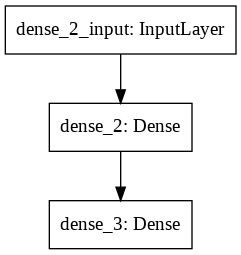

In [59]:
tf.keras.utils.plot_model(model)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.9556


[0.5040267705917358, 0.9555555582046509]